RMSLE(Root Mean Squared Logarithmic Error) of ECLO


ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1

# Library, data load

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [21]:
path = 'dataset/'
test_df = pd.read_csv(path + 'test.csv')
train_df = pd.read_csv(path + 'train.csv')

In [22]:
train_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [24]:
train_df.describe()

,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704
std,0.090109,0.500845,0.992034,0.394670,3.207206
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


In [25]:
# train df null count
train_df.isnull().sum()

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

# Test

In [26]:
# 사망, 중상, 경상, 부상 자 수가 서로 독립변수인가?
train_df[['사망자수', '중상자수', '경상자수', '부상자수']].corr()

,사망자수,중상자수,경상자수,부상자수
사망자수,1.000000,-0.004368,-0.060607,-0.022771
중상자수,-0.004368,1.000000,-0.325585,-0.105167
경상자수,-0.060607,-0.325585,1.000000,-0.165157
부상자수,-0.022771,-0.105167,-0.165157,1.000000


# 요일, 기상상태, 도로형태, 노면상태, 사고유형 별 ECLO 평균과 count

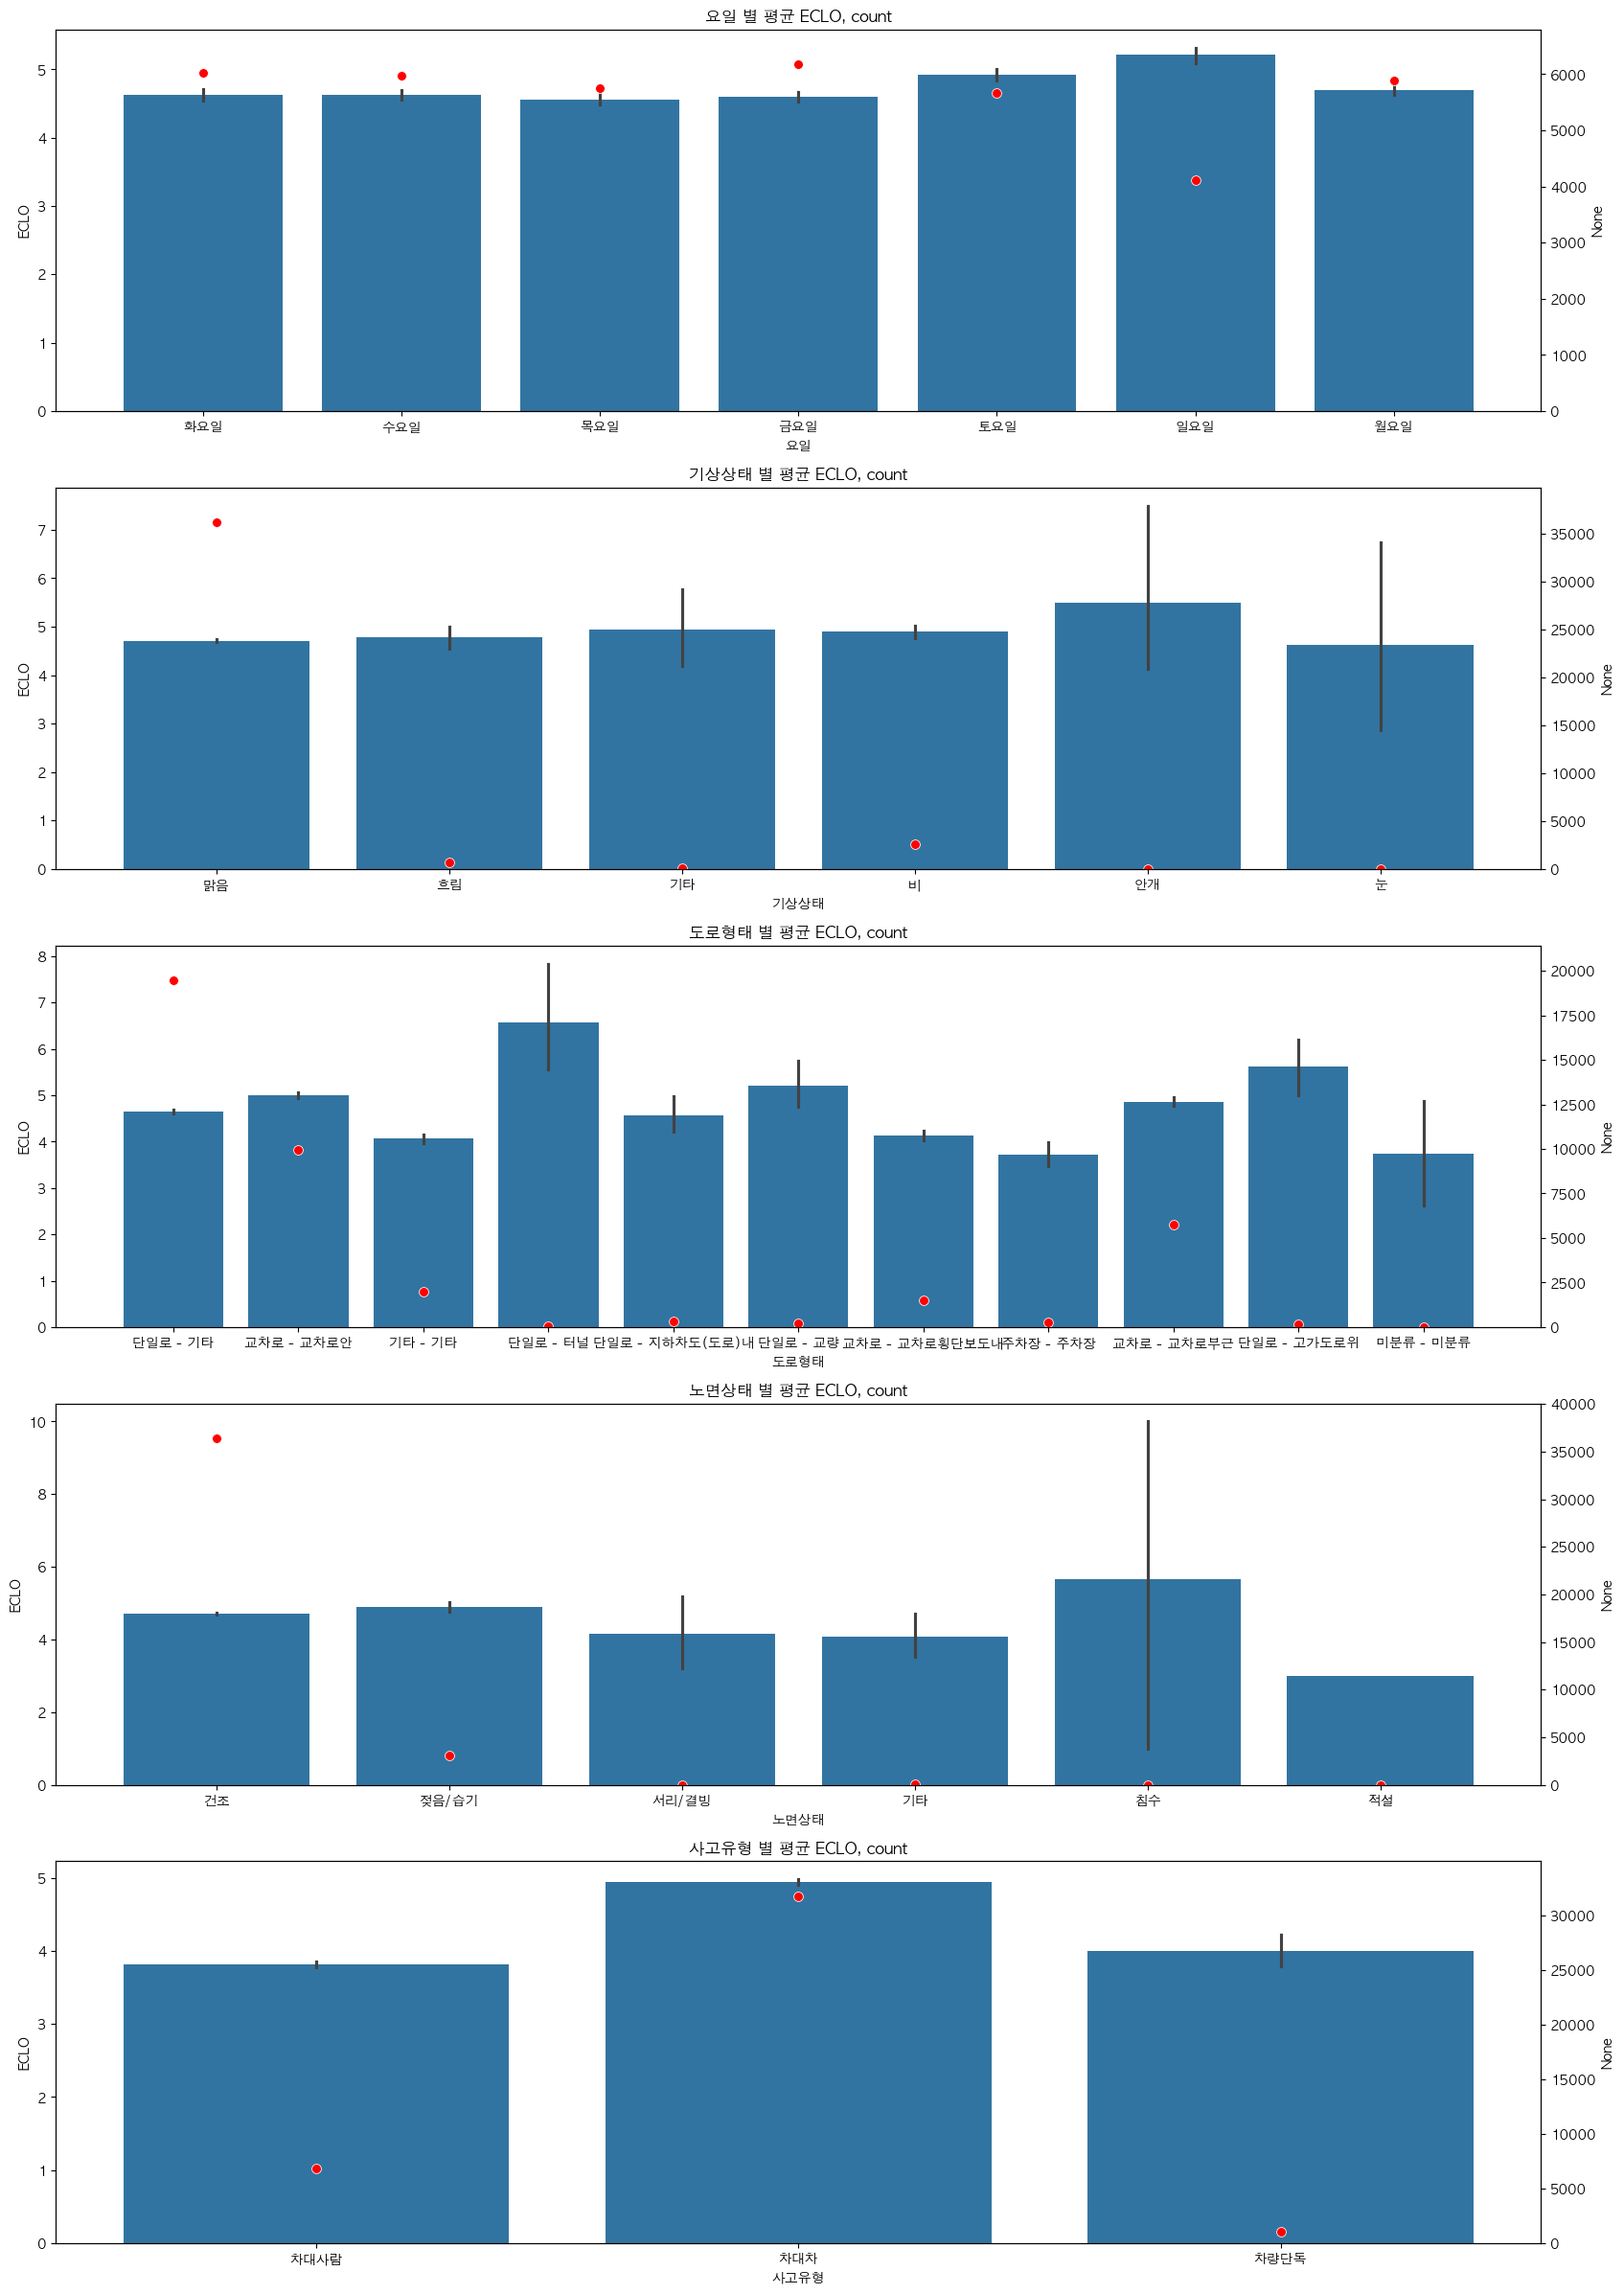

In [27]:
columns = ['요일', '기상상태', '도로형태', '노면상태', '사고유형']
fig, ax = plt.subplots(5, 1, figsize=(20, 30))
for i in range(5):
    column = columns[i]
    sns.barplot(x=column, y='ECLO', data=train_df, ax=ax[i], estimator=np.mean)    
    ax2 = ax[i].twinx()
    count = train_df.groupby(column).size()
    sns.scatterplot(x=count.index, y=count, ax=ax2, color='red', s=50)
    ax2.set_ylim(0, count.max() * 1.1)
    ax[i].set_title(f'{column} 별 평균 ECLO, count')
plt.show()

In [28]:
# 노면 상태에 따른 데이터 개수
train_df['노면상태'].value_counts()

노면상태
건조       36420
젖음/습기     3100
기타          58
서리/결빙       25
침수           3
적설           3
Name: count, dtype: int64

# 사고 유형 별 사망자수, 중상자수, 경상자수, 부상자수 평균

/var/folders/dj/hc9ss63n1cj82pjn8hjjbt3m0000gn/T/ipykernel_28626/4146260897.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].axhline(means[i], color='red', linestyle='--')
/var/folders/dj/hc9ss63n1cj82pjn8hjjbt3m0000gn/T/ipykernel_28626/4146260897.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].axhline(means[i], color='red', linestyle='--')
/var/folders/dj/hc9ss63n1cj82pjn8hjjbt3m0000gn/T/ipykernel_28626/4146260897.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

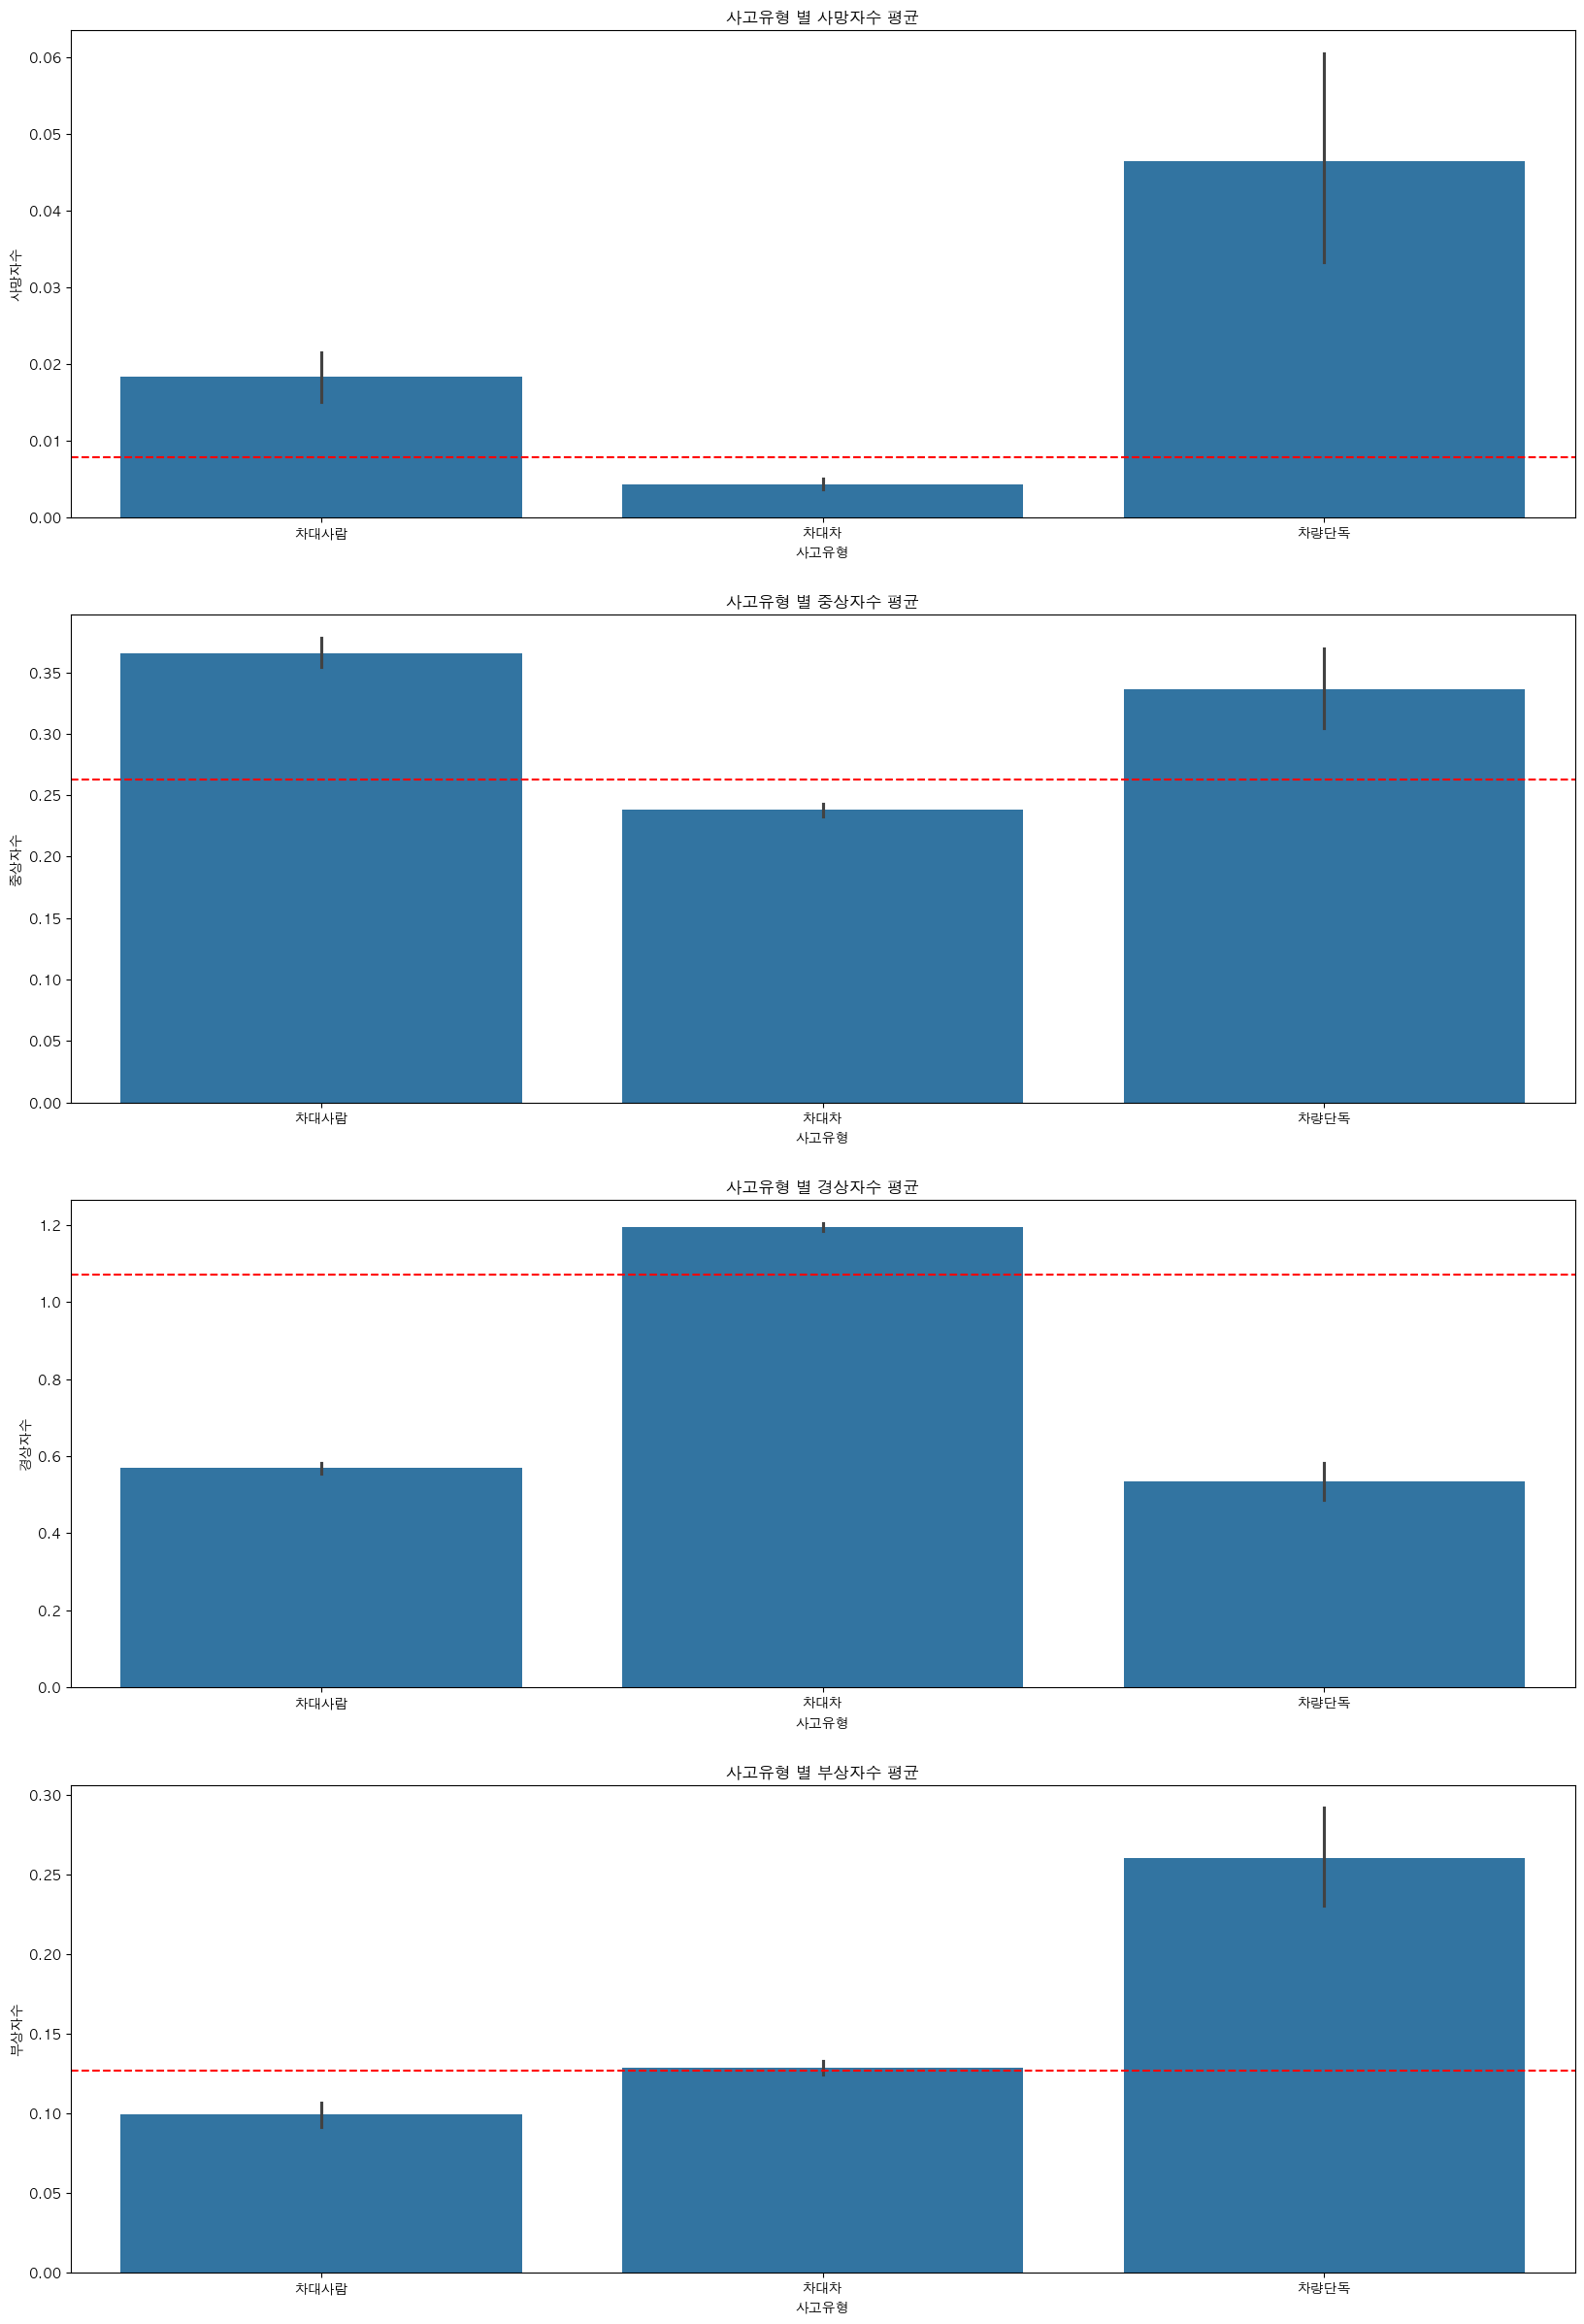

In [29]:
# 사고 유형 별로 groupby 해서, 사망자수, 중상자수, 경상자수, 부상자수의 평균 graph
fig, ax = plt.subplots(4, 1, figsize=(20, 30))
columns = ['사망자수', '중상자수', '경상자수', '부상자수']
# 전체 데이터의 사망자수, 중상자수, 경상자수, 부상자수 평균
means = train_df[columns].mean()

for i in range(4):
    column = columns[i]
    sns.barplot(x='사고유형', y=column, data=train_df, ax=ax[i], estimator=np.mean)
    # 전체 데이터의 사망자수, 중상자수, 경상자수, 부상자수 평균 그리기
    ax[i].axhline(means[i], color='red', linestyle='--')
    ax[i].set_title(f'사고유형 별 {column} 평균')
plt.show()


# 사고일시 별, ECLO 평균, count

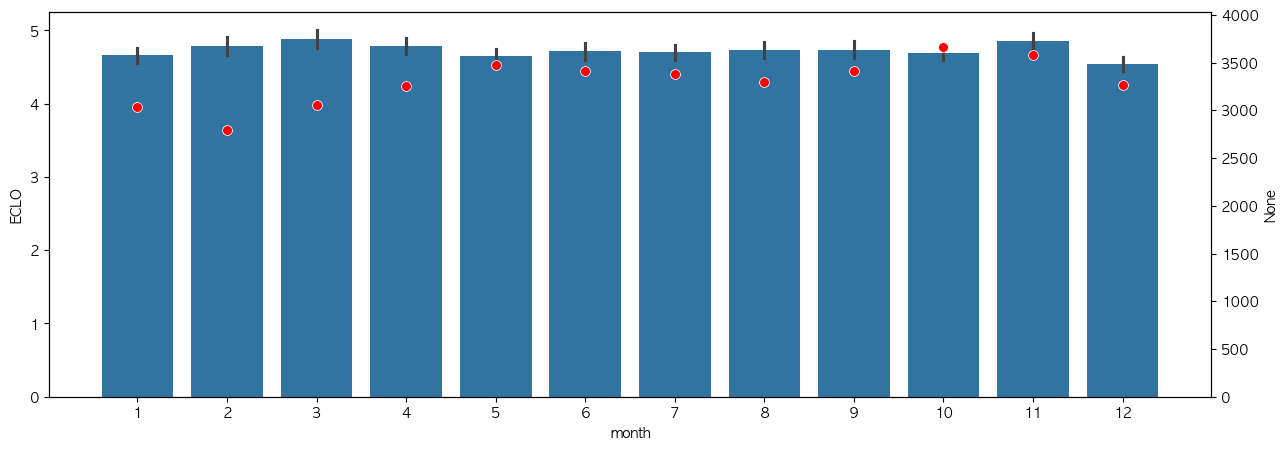

In [30]:
# train_df month column 추가
train_df['month'] = train_df['사고일시'].apply(lambda x: int(x.split('-')[1]))
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x='month', y='ECLO', data=train_df, ax=ax, estimator=np.mean)
ax2 = ax.twinx()
count = train_df.groupby('month').size()
sns.scatterplot(x=count.index-1, y=count, ax=ax2, color='red', s=50)
ax2.set_ylim(0, count.max() * 1.1)
plt.show()

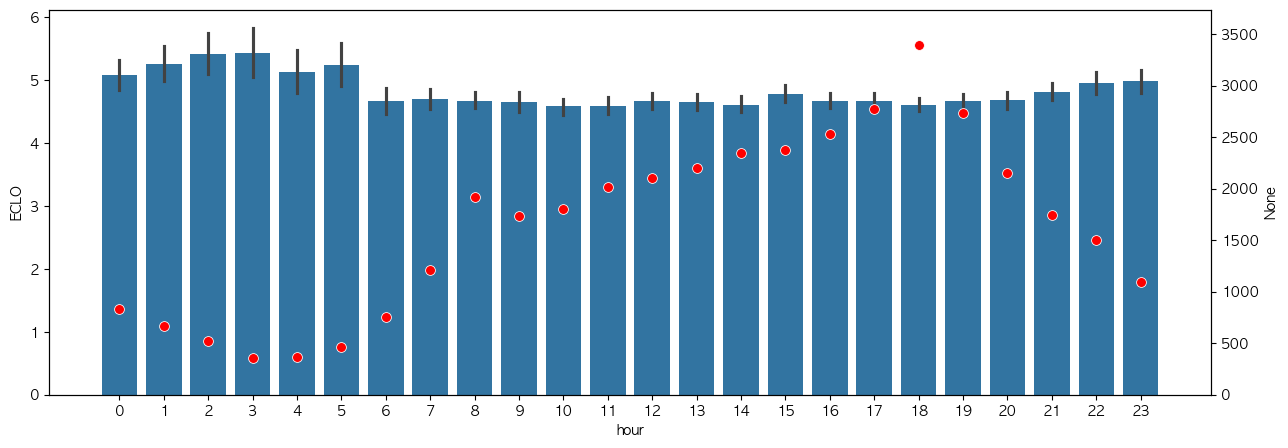

In [31]:
train_df['hour'] = train_df['사고일시'].apply(lambda x: int(x.split(' ')[1]))
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x='hour', y='ECLO', data=train_df, ax=ax, estimator=np.mean)
ax2 = ax.twinx()
count = train_df.groupby('hour').size()
sns.scatterplot(x=count.index, y=count, ax=ax2, color='red', s=50)
ax2.set_ylim(0, count.max() * 1.1)
plt.show()

# 지역

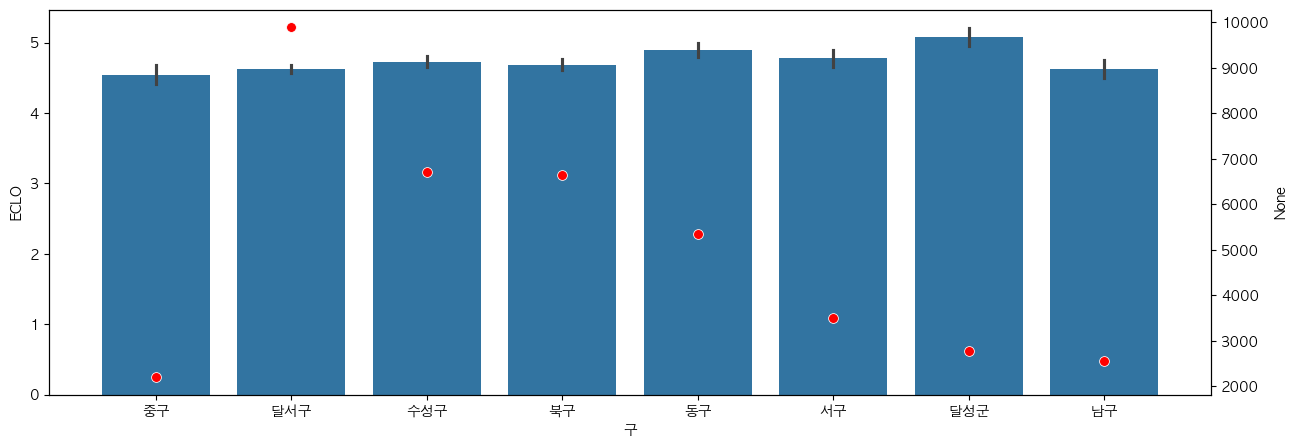

In [32]:
# 구 별 사고 확인을 위해 column 추가
train_df['시'] = train_df['시군구'].apply(lambda x: x.split(' ')[0])
train_df['구'] = train_df['시군구'].apply(lambda x: x.split(' ')[1])
train_df['동'] = train_df['시군구'].apply(lambda x: x.split(' ')[2])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x='구', y='ECLO', data=train_df, ax=ax, estimator=np.mean)
ax2 = ax.twinx()
count = train_df.groupby('구').size()
sns.scatterplot(x=count.index, y=count, ax=ax2, color='red', s=50)
plt.show()


In [79]:
# 동 별 사고 ECLO 평균, count 확인 sorted dict로
count = train_df.groupby('동').size()
mean = train_df.groupby('동')['ECLO'].mean()
data = {'동': mean.index, 'mean': mean.values, 'count': count.values}
data = pd.DataFrame(data)
# data count 가 count의 평균 이상인 데이터만
data = data[data['count'] > data['count'].mean()]
data = data.sort_values(by='mean', ascending=False)
data[:60]

,동,mean,count
32,논공읍,5.600775,258
135,옥포읍,5.382353,204
146,유가읍,5.319838,247
88,불로동,5.294931,217
163,죽전동,5.252708,277
137,용계동,5.150442,226
77,범물동,5.079498,239
106,서변동,5.077640,322
25,내당동,5.018124,938
14,관음동,4.990909,220


# Test dataset load

In [33]:
test_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [34]:
path = 'dataset/external_open/'
light_df = pd.read_csv(path + '대구 보안등 정보.csv', encoding='cp949')
kids_df = pd.read_csv(path + '대구 어린이 보호 구역 정보.csv', encoding='cp949')
car_df = pd.read_csv(path + '대구 주차장 정보.csv', encoding='cp949')
cctv_df = pd.read_csv(path + '대구 CCTV 정보.csv', encoding='cp949')
countrywide_df = pd.read_csv(path + 'countrywide_accident.csv')

/var/folders/dj/hc9ss63n1cj82pjn8hjjbt3m0000gn/T/ipykernel_28626/2239108470.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  light_df = pd.read_csv(path + '대구 보안등 정보.csv', encoding='cp949')


In [35]:
light_df.shape, kids_df.shape, car_df.shape, cctv_df.shape, countrywide_df.shape

((71913, 8), (640, 12), (871, 29), (1065, 18), (602775, 23))

# 추가 table load

In [36]:
light_df.head()

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주


In [37]:
kids_df.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23


In [38]:
car_df.head()

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
0,153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01
1,153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020-01-01
2,153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020-01-01
3,153-2-000004,고산골공영주차장,공영,노외,대구광역시 남구 용두2길 43,대구광역시 남구 봉덕동 1256,88,2,미시행,평일+토요일+공휴일,...,10.0,100.0,210.0,2000.0,20000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.830066,128.603443,2020-01-01
4,153-2-000005,봉덕시장공영주차장,공영,노외,대구광역시 남구 봉덕로25길 6,대구광역시 남구 봉덕동 976-5,32,1,미시행,평일+토요일+공휴일,...,10.0,200.0,160.0,3000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.844925,128.602667,2020-01-01


In [39]:
cctv_df.head()

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,NaN,NaN,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,NaN,NaN,99.0,2014.0


In [40]:
light_df.shape, kids_df.shape, car_df.shape, cctv_df.shape

((71913, 8), (640, 12), (871, 29), (1065, 18))

In [41]:
# 위도 경도 null 데이터 제거
light_df = light_df.dropna(subset=['위도', '경도'])
kids_df = kids_df.dropna(subset=['위도', '경도'])
car_df = car_df.dropna(subset=['위도', '경도'])
cctv_df = cctv_df.dropna(subset=['위도', '경도'])

In [42]:
countrywide_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,COUNTRYWIDE_ACCIDENT_000000,2019-01-01 00,화요일,맑음,서울특별시 강서구 방화동,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,40세,경상,0,0,1,0,3
1,COUNTRYWIDE_ACCIDENT_000001,2019-01-01 00,화요일,맑음,경기도 포천시 소흘읍,교차로 - 교차로안,건조,차대차,기타,직진우회전진행방해,...,상해없음,이륜,남,20세,경상,0,0,1,0,3
2,COUNTRYWIDE_ACCIDENT_000002,2019-01-01 00,화요일,맑음,경기도 양주시 고암동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,17세,중상,0,1,0,0,5
3,COUNTRYWIDE_ACCIDENT_000003,2019-01-01 00,화요일,맑음,경기도 남양주시 다산동,기타 - 기타,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,10세,중상,0,2,0,0,10
4,COUNTRYWIDE_ACCIDENT_000004,2019-01-01 00,화요일,맑음,인천광역시 부평구 부평동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,승용,남,56세,경상,0,0,2,1,7


In [68]:
countrywide_df["노면상태"].value_counts()

노면상태
건조       577049
젖음/습기     56334
기타         5508
서리/결빙      2209
적설         1186
침수           70
해빙           27
Name: count, dtype: int64

(600000, 28) (39609, 28)


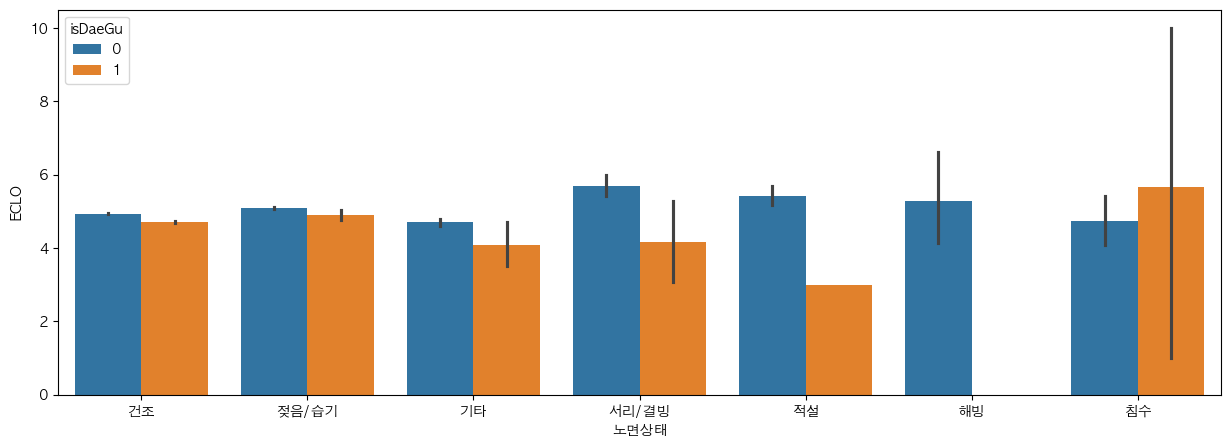

In [67]:
#countrywide + train_df concat
ctemp_df = countrywide_df[:600000].copy()
ttemp_df = train_df[:60000].copy()
print(ctemp_df.shape, ttemp_df.shape)
# ctemp_df 컬럼 추가 isDaeGu
ctemp_df['isDaeGu'] = 0
ttemp_df['isDaeGu'] = 1
c_df = pd.concat([ctemp_df, ttemp_df], axis=0)
c_df.set_index('ID', inplace=True)
c_df.head()
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x='노면상태', y='ECLO', data=c_df, ax=ax, estimator=np.mean, hue='isDaeGu')
plt.show()